In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model


Using TensorFlow backend.
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\program files\python36\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
# #### Hold out Zeros

# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')

# data[data.iloc[:,2]==0].to_csv('../../triple_cosineSNF(zeros).csv',index=False)
# del data

In [3]:
# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')
# data = data[data['2']!=0]
# data.to_csv('triple_cosineSNF(-1and1).csv',index=False)


In [11]:
dataTrain = pd.read_csv('../../triple42702.csv')
dataTest = pd.read_csv('../../tripleTest.csv')
# dataTest = pd.read_csv('../../triple_cosineSNF(zeros).csv')

# print(dataTest.shape,dataTrain.shape)

In [ ]:
# dataTest.head()

In [5]:
# X_train = dataTrain.values[:,3:]
# y_train = dataTrain.values[:,2].astype(int)
# del dataTrain
# # X_test = dataTest.values[:,3:]
# # y_test = dataTest.values[:,2].astype(int)


In [6]:
# trainNum = len(X_train)

In [5]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

In [6]:
16*71

1136

In [7]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

In [10]:
# X_train.shape

In [8]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

In [12]:
# y_train

In [9]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

# #one-hot encode target column
# # y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# # y_test[0]

In [14]:
# y_train

In [12]:
X_train = dataTrain.values[:,3:]
y_train = dataTrain.values[:,2].astype(int)
del dataTrain
trainNum = len(X_train)
X_test = dataTest.values[:,3:]
y_test = dataTest.values[:,2].astype(int)

testNum = len(X_test)

#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

y_train = y_train + 1
y_test  = y_test + 1
y_train = y_train / 2
y_test  = y_test / 2
print(y_train[0], y_test[0])

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_test[0]


0.0 1.0


array([0., 1.], dtype=float32)

In [13]:


#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense( 64, activation='relu'))
model.add(Dense( 2, activation='relu'))
model.add(Softmax(128))
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

# ### Load the model's saved weights.
# model.load_weights('cnn42702(1and-1).h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              3556352   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                65600     
__________

In [17]:
#### plotting model
# plot_model(model,show_shapes = True, to_file='model.png')

In [ ]:
#### train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)
# model.fit(X_train, y_train, epochs=10)


Train on 42702 samples, validate on 4302 samples
Epoch 1/10
 2752/42702 [>.............................] - ETA: 8:17 - loss: 0.5388 - acc: 0.7856

In [ ]:
### Saveing the Model
model.save_weights('cnn42702(1and-1)1.h5')


In [14]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

# #one-hot encode target column
# # y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# # y_test[0]


# #predict first 4 images in the test set
# predit = model.predict(X_test)
# predit

array([[5.6742269e-01, 4.3257731e-01],
       [5.0000000e-01, 5.0000000e-01],
       [4.9575707e-01, 5.0424296e-01],
       ...,
       [9.9830604e-01, 1.6939403e-03],
       [2.0681505e-06, 9.9999797e-01],
       [2.3965668e-03, 9.9760348e-01]], dtype=float32)

In [15]:
# #actual results for first 4 images in test set
# print(predit[:4])
# predit[:4]


[[5.6742269e-01 4.3257731e-01]
 [5.0000000e-01 5.0000000e-01]
 [4.9575707e-01 5.0424296e-01]
 [9.9993765e-01 6.2310624e-05]]


array([[5.6742269e-01, 4.3257731e-01],
       [5.0000000e-01, 5.0000000e-01],
       [4.9575707e-01, 5.0424296e-01],
       [9.9993765e-01, 6.2310624e-05]], dtype=float32)

In [23]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

# prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
# aupr_val = auc(rec, prec)
# fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
# auc_val = auc(fpr, tpr)
# print(aupr_val,auc_val)

In [24]:
# model.history.history['val_acc']

In [16]:

# # Plot training & validation accuracy values
# plt.plot(list(range(1,16)),model.history.history['acc'])
# # plt.plot(list(range(1,6)),model.history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(list(range(1,16)),model.history.history['loss'])
# # plt.plot(list(range(1,6)),model.history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [17]:
# # predit
# predit[:,0].shape 

(2000,)

In [ ]:
# predicts = []
# for a,b in predit:
#     if a >=b:
#         predicts.append(0)
#     else:
#         predicts.append(1)

In [58]:
predicts = []
e = d = z = 0
zeroIndexes = []
k = 0
for i in range(0,279354,46559):
    j = i + 46559
    # X_train = dataTrain.values[:,3:]
    # y_train = dataTrain.values[:,2].astype(int)
    # del dataTrain
    X_test = dataTest.values[i:j,3:]
#     y_test = dataTest.values[i:j,2].astype(int)

    testNum = len(X_test)

    #reshape data to fit model
    # X_train = X_train.reshape(trainNum,16,71,1)
    X_test = X_test.reshape(testNum,16,71,1)

    # y_train = y_train + 1
#     y_test  = y_test + 1
    # y_train = y_train / 2
#     y_test  = y_test / 2
    # print(y_train[0], y_test[0])

    #one-hot encode target column
    # y_train = to_categorical(y_train)
#     y_test = to_categorical(y_test)
    # y_test[0]


    #predict first 4 images in the test set
    predit = model.predict(X_test)
    pd.DataFrame(predit).to_csv('predict_' + str(k) + '.csv', index=False)
#     predit
    k += 1
    for a,b in predit:
        if a >=0.6:
            predicts.append(0)
            d += 1
        elif b>=0.6:
            predicts.append(2)
            e += 1
        else:
            predicts.append(1)
            z += 1
            zeroIndexes.append(i)
print('degrassive', d, 'enhancive', e, 'zeros', z)

0 46559
46559 93118
93118 139677
139677 186236
186236 232795
232795 279354


In [ ]:
pd.DataFrame(zeroIndexes).to_csv('zero indexes.csv', index=False)

In [23]:

# cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)))
# print(cm)

# CR = classification_report(list((dataTest.values[:,2]+1)),list(predicts))
# print(CR)
# print(145/4702)
# # i=0
# # for j in list(data.values[9500:,2]+1):
# #     if j==1:
# #         i +=1
# # print(i)

# # plt.show()
# plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)), list(predicts))


In [24]:
pd.DataFrame(predit)

,0,1
0,0.567423,0.432577
1,0.500000,0.500000
2,0.495757,0.504243
3,0.999938,0.000062
4,0.982615,0.017385
...,...,...
1995,0.000868,0.999132
1996,0.000836,0.999164
1997,0.998306,0.001694
1998,0.000002,0.999998


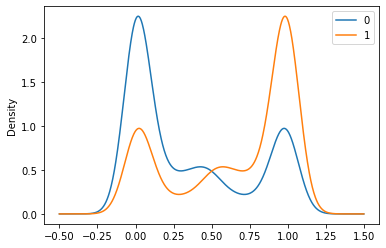

In [25]:
pd.DataFrame(predit).plot.density()


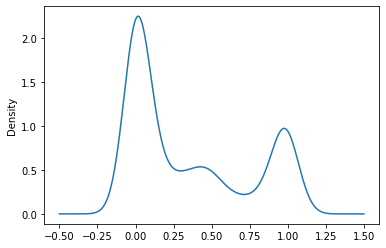

In [26]:
pd.DataFrame(predit).iloc[:,0].plot.density()

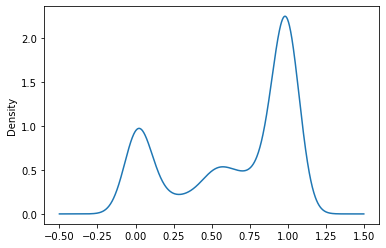

In [27]:
pd.DataFrame(predit).iloc[:,1].plot.density()

Text(0, 0.5, 'frequency distribution')

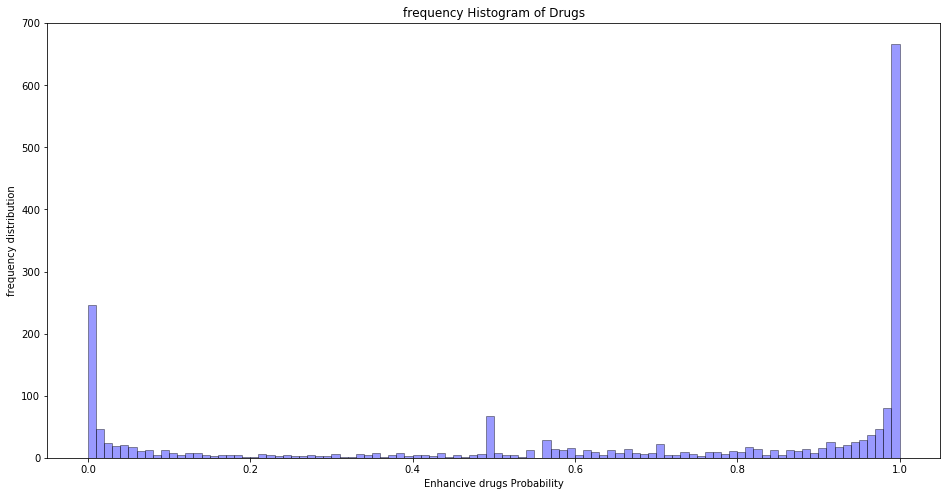

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')


Text(0, 0.5, 'frequency distribution')

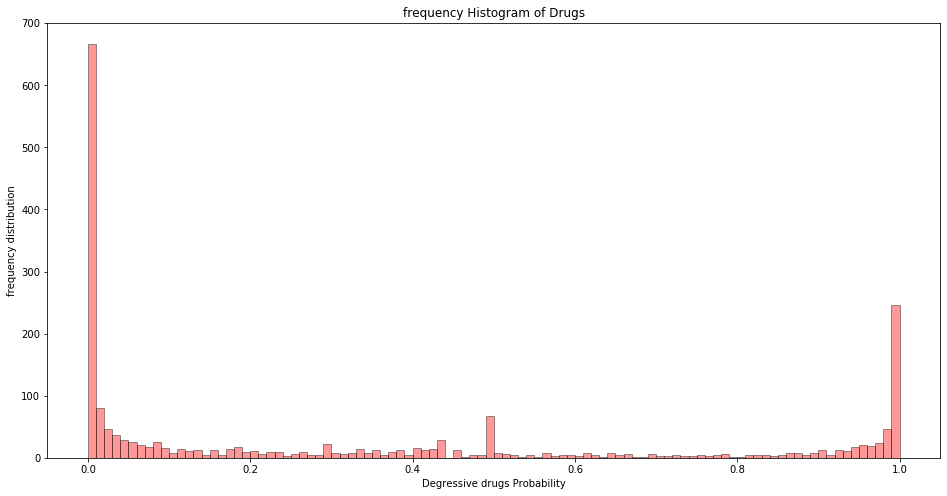

In [31]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')

Text(0, 0.5, 'frequency distribution')

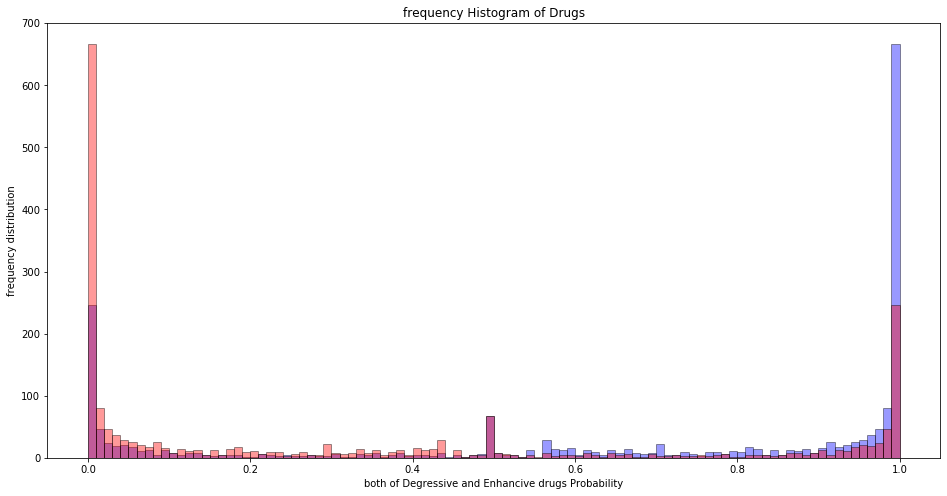

In [32]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')

In [55]:
279354/2/3

46559.0